# Look at data

In [2]:
#
import pandas as pd

com_news_df = pd.read_csv("data/Combined_News_DJIA.csv")
com_news_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
# look at the top1 headlines
com_news_df.Top1.to_list()[:20]

['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"',
 "b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",
 "b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'",
 "b' U.S. refuses Israel weapons to attack Iran: report'",
 "b'All the experts admit that we should legalise drugs '",
 'b"Mom of missing gay man: Too bad he\'s not a 21-year-old cheerleader, then they\'d still be looking for him"',
 "b'In an Afghan prison, the majority of female prisoners are serving 20-year sentences for being victims of rape '",
 'b"Man arrested and locked up for five hours after taking photo of police van ignoring \'no entry\' sign"',
 "b'Two elderly Chinese women have been sentenced to a year of re-education through labor after they sought a permit to demonstrate in an official Olympic protest area.'",
 'b"British resident held in Guantanamo Bay wins legal battle to force Foreign Office to rev

# Preprocessing the codes.

In [4]:
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prepro_text(target_text):
    # if b'/b"
    target_text = re.sub(r"^b[\'\"]", '', target_text)
    target_text = re.sub(r"[^\w\s]", '', target_text)
    target_text = target_text.lower().strip()
    target_text = target_text.split()
    target_text = ' '.join([x for x in target_text if x not in stopwords.words('english')])
    return target_text

In [51]:
# applymap to the whole dataframe
com_news_df.iloc[:,2:] = com_news_df.iloc[:,2:].applymap(lambda element:prepro_text(str(element)))
com_news_df.head()

# restart and run the following code only once!
# com_news_df.to_csv('cleaned_Combined_News_DJIA.csv')

KeyboardInterrupt: 

# text vectors

In [6]:
# reload data 
import pandas as pd

new_df = pd.read_csv('cleaned_Combined_News_DJIA.csv')

In [7]:
new_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,8/8/2008,0,georgia downs two russian warplanes countries ...,breaking musharraf impeached,russia today columns troops roll south ossetia...,russian tanks moving towards capital south oss...,afghan children raped impunity un official say...,150 russian tanks entered south ossetia whilst...,breaking georgia invades south ossetia russia ...,...,georgia invades south ossetia russia gets invo...,alqaeda faces islamist backlash,condoleezza rice us would act prevent israeli ...,busy day european union approved new sanctions...,georgia withdraw 1000 soldiers iraq help fight...,pentagon thinks attacking iran bad idea us new...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitors suffering mental illnesses banned oly...,help mexicos kidnapping surge
1,1,8/11/2008,1,wont america nato help us wont help us help iraq,bush puts foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russians advance ...,olympic opening ceremony fireworks faked,mossad fraudulent new zealand passports iraq,russia angered israeli military sale georgia,...,israel us behind georgian aggression,believe tv neither russian georgian much victims,riots still going montreal canada police murde...,china overtake us largest manufacturer,war south ossetia pics,israeli physicians group condemns state torture,russia beaten united states head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food
2,2,8/12/2008,0,remember adorable 9yearold sang opening ceremo...,russia ends georgia operation,sexual harassment would children,alqaeda losing support iraq brutal crackdown a...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russogeorgian war balance power,...,us troops still georgia know georgia first place,russias response georgia right,gorbachev accuses us making serious blunder pu...,russia georgia nato cold war two,remember adorable 62yearold led country war ba...,war georgia israeli connection,signs point us encouraging georgia invade sout...,christopher king argues us nato behind georgia...,america new mexico,bbc news asiapacific extinction man climate
3,3,8/13/2008,0,us refuses israel weapons attack iran report,president ordered attack tskhinvali capital so...,israel clears troops killed reuters cameraman,britains policy tough drugs pointless says for...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivors prefab ...,bush announces operation get russias grill yea...,...,elephants extinct 2020,us humanitarian missions soon georgia russia h...,georgias ddos came us sources,russian convoy heads georgia violating truce,israeli defence minister us strike iran,gorbachev choice,witness russian forces head towards tbilisi br...,quarter russians blame us conflict poll,georgian president says us military take contr...,2006 nobel laureate aleksander solzhenitsyn ac...
4,4,8/14/2008,1,experts admit legalise drugs,war south osetia 89 pictures made russian soldier,swedish wrestler ara abrahamian throws away me...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random houses refusal publish...,poland us agree missle defense deal interestin...,...,bank analyst forecast georgian crisis 2 days e...,georgia confict could set back russias us rela...,war caucasus much product american imperial dr...,nonmedia photos south ossetiageorgia conflict,georgian tv reporter shot russian sniper live ...,saudi arabia mother moves block child marriage,taliban wages war humanitarian aid workers,russia world forget georgias territorial integ...,darfur rebels accuse sudan mounting major attack,philippines peace advocate say muslims need as...


In [8]:
# training and test split!
# let's first use Top1 only!
from sklearn.model_selection import train_test_split

X = new_df['Top1']
y = new_df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)



In [9]:
# print(type(text_vector()[0]))
# print(type(text_vector()[1]))

In [53]:
# only run once for the following code!

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sentence_transformers import SentenceTransformer
# sentBert = SentenceTransformer('paraphrase-distilroberta-base-v1')
from tqdm.auto import tqdm
from sklearn.preprocessing import MaxAbsScaler
# Universal Sentence Encoder
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use = hub.load(module_url)
print("module %s loaded" % module_url)
import numpy as np

OSError: SavedModel file does not exist at: C:\Users\Josh\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c/{saved_model.pbtxt|saved_model.pb}

In [11]:
# return the vectors
def text_vector(target_method='tfidf', \
                target_list_train=X_train.to_list(),\
                target_list_test = X_test.to_list(),\
                max_features=None):
    """
    type: target_method: string - ("tfidf", "bert", "embedding")
    rtype: list of vectors
    """
    
    
#     if target_method == "bert":
#         sentBert_x_train = []
#         sentBert_x_test = []
        
#         for i in tqdm(range(len(target_list_train))):
#             emb = sentBert.encode(target_list_train[i])
#             sentBert_x_train.append(emb)
#         sentBert_x_train = np.asarray(sentBert_x_train)

#         for i in tqdm(range(len(target_list_test))):
#             emb = sentBert.encode(target_list_test[i])
#             sentBert_x_test.append(emb)
#         sentBert_x_test = np.asarray(sentBert_x_test)
        
#         sentBert_scaler = MaxAbsScaler()
#         sentBert_x_train = sentBert_scaler.fit_transform(sentBert_x_train)
#         sentBert_x_test = sentBert_scaler.transform(sentBert_x_test)
#         return sentBert_x_train, sentBert_x_test

    if target_method == "embedding":
        use_x_train = []
        use_x_test = []
        use_x_train = use(target_list_train)
        use_x_test = use(target_list_test)
        return use_x_train, use_x_test
    
    if target_method == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_train = vectorizer.fit_transform(target_list_train)
        tfidf_test = vectorizer.transform(target_list_test)
        tfidf_scaler = MaxAbsScaler()
        tfidf_x_train = tfidf_scaler.fit_transform(tfidf_train)
        tfidf_x_test = tfidf_scaler.transform(tfidf_test)
        return tfidf_x_train, tfidf_x_test

# tfidf, 
print(type(text_vector()[0].toarray()))
print(len(text_vector()[0].toarray()[0]))

print(type(text_vector()[1].toarray()))
print(len(text_vector()[1].toarray()[0]))

print(text_vector()[1])
;

#get the MSE 

NameError: name 'TfidfVectorizer' is not defined

In [49]:
# sentBert
ans = text_vector(target_method='bert')

print(ans[0])
print(type(ans[0]))
print(len(ans[0][0]))

print(ans[1])
print(type(ans[1]))
print(len(ans[1][0]))


TypeError: 'NoneType' object is not subscriptable

In [50]:
# tensorflow
ans = text_vector(target_method='embedding')

print(ans[0])
print(type(ans[0]))
print(len(ans[0][0]))

print(ans[1])
print(type(ans[1]))
print(len(ans[1][0]))

NameError: name 'use' is not defined

# sentiment scores

In [20]:
#uses textblob to get the sentiment scores of the column 

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

def text_sent(target_method, target_list_text):
    """
    
    rtype: list of entiment scores
    """
    if target_method == 'blob':
        blob_list = []
        for title in target_list_text:
            blob = TextBlob(title)
            blob_list.append(blob.sentiment.polarity)
    
        return blob_list
    
    if target_method == 'NLTK':
        NLTK_list = []

        for title in target_list_text:
            sia_polarity = sia.polarity_scores(title)
            NLTK_list.append(sia_polarity['compound'])
        return NLTK_list

    

In [17]:
#print out the sentiment score of the column "Top1" using textblob 

text_sent("blob",new_df['Top1'])

Top1_sent_blob = text_sent("blob",new_df['Top1'])

#Add the sentiment of Textblob Top1 to the DF

new_df['Top1_sent_blob'] = Top1_sent_blob



In [21]:
#print out the sentiment score of the column "Top1" using NLTK


from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

text_sent('NLTK', new_df['Top1'])

Top1_sent_NLTK = text_sent('NLTK', new_df['Top1'])

#Add the sentiment of NTLK Top1 to the DF

new_df['Top1_sent_NLTK'] = Top1_sent_NLTK

new_df  

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Top1_sent_blob,Top1_sent_NLTK
0,0,8/8/2008,0,georgia downs two russian warplanes countries ...,breaking musharraf impeached,russia today columns troops roll south ossetia...,russian tanks moving towards capital south oss...,afghan children raped impunity un official say...,150 russian tanks entered south ossetia whilst...,breaking georgia invades south ossetia russia ...,...,condoleezza rice us would act prevent israeli ...,busy day european union approved new sanctions...,georgia withdraw 1000 soldiers iraq help fight...,pentagon thinks attacking iran bad idea us new...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitors suffering mental illnesses banned oly...,help mexicos kidnapping surge,0.000,-0.5994
1,1,8/11/2008,1,wont america nato help us wont help us help iraq,bush puts foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russians advance ...,olympic opening ceremony fireworks faked,mossad fraudulent new zealand passports iraq,russia angered israeli military sale georgia,...,riots still going montreal canada police murde...,china overtake us largest manufacturer,war south ossetia pics,israeli physicians group condemns state torture,russia beaten united states head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food,0.000,-0.6979
2,2,8/12/2008,0,remember adorable 9yearold sang opening ceremo...,russia ends georgia operation,sexual harassment would children,alqaeda losing support iraq brutal crackdown a...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russogeorgian war balance power,...,gorbachev accuses us making serious blunder pu...,russia georgia nato cold war two,remember adorable 62yearold led country war ba...,war georgia israeli connection,signs point us encouraging georgia invade sout...,christopher king argues us nato behind georgia...,america new mexico,bbc news asiapacific extinction man climate,0.000,0.0258
3,3,8/13/2008,0,us refuses israel weapons attack iran report,president ordered attack tskhinvali capital so...,israel clears troops killed reuters cameraman,britains policy tough drugs pointless says for...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivors prefab ...,bush announces operation get russias grill yea...,...,georgias ddos came us sources,russian convoy heads georgia violating truce,israeli defence minister us strike iran,gorbachev choice,witness russian forces head towards tbilisi br...,quarter russians blame us conflict poll,georgian president says us military take contr...,2006 nobel laureate aleksander solzhenitsyn ac...,0.000,-0.7184
4,4,8/14/2008,1,experts admit legalise drugs,war south osetia 89 pictures made russian soldier,swedish wrestler ara abrahamian throws away me...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random houses refusal publish...,poland us agree missle defense deal interestin...,...,war caucasus much product american imperial dr...,nonmedia photos south ossetiageorgia conflict,georgian tv reporter shot russian sniper live ...,saudi arabia mother moves block child marriage,taliban wages war humanitarian aid workers,russia world forget georgias territorial integ...,darfur rebels accuse sudan mounting major attack,philippines peace advocate say muslims need as...,0.000,0.2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1984,6/27/2016,0,barclays rbs shares suspended trading tanking 8,pope says church ask forgiveness gays past tre...,poland shocked xenophobic abuse poles uk,second referendum cabinet agrees,scotland welcome join eu merkel ally says,sterling dips fridays 31year low amid brexit u...,negative news south african pre

# topic modelings 

In [ ]:
def text_models():
    """
    rtype: list of models
    """
    
    
    
    return 
    

In [58]:
#Do a simple logistic regression model using sentiment to predict if stocks went up or down
#Use text blob and NLTK as the X and the Label of whether stock
#went down or up as the y

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = new_df[['Top1_sent_NLTK','Top1_sent_blob']]
y = new_df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)



In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.48      1.00      0.65       191

    accuracy                           0.48       398
   macro avg       0.24      0.50      0.32       398
weighted avg       0.23      0.48      0.31       398



C:\Users\Josh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


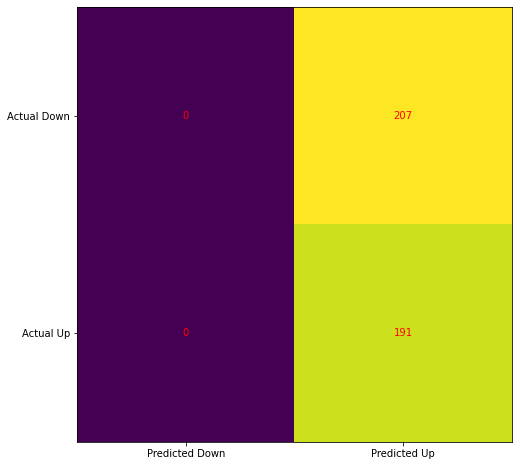

In [61]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Looks like the model predicted the label to be raising every time.

It was not very accurate so far. It was incorrect over 50% of the time. 